# House Prices: Advanced Regression Techniques, Part 1
## Load, explore, and clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

%matplotlib inline 
pd.options.display.precision = 4
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Load the Data

The data set is split across three tables:

- `listing_training`
- `zoning`
- `sale`

Load the data from these tables:
1. connect to the database using `psycopg2`
1. use a `psycopg2.extras.RealDictCursor` so that you get the columns names returned with your query
1. pull the data using a `SELECT` `JOIN` statement 
1. you should be able to join all tables using `id`
1. load the result into a `pandas.DataFrame`
1. use `id` as the index for your DataFrame

In [2]:
import psycopg2 as pg2
import psycopg2.extras as pgex

conn = pg2.connect(host="michaelgfrantz.com", user="postgres", password="dsism4")
curs = conn.cursor(cursor_factory=pgex.RealDictCursor)

query =  """
SELECT * FROM listing_training 
JOIN zoning on listing_training.id = zoning.id
JOIN sale on zoning.id = sale.id;
"""

curs.execute(query)
results = curs.fetchall()
conn.close()

In [3]:
iowa_df = pd.DataFrame(results)

In [4]:
iowa_df = iowa_df.set_index('id')

In [5]:
iowa_df.head()

,alley,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,...,secondflrsf,street,threessnporch,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold
id,,,,,,,,,,,,,,,,,,,,,
1,None,3,1Fam,TA,No,706,0,GLQ,Unf,1,...,854,Pave,0,856,8,AllPub,0,2003,2003,2008
4,None,3,1Fam,Gd,No,216,0,ALQ,Unf,1,...,756,Pave,0,756,7,AllPub,0,1915,1970,2006
5,None,4,1Fam,TA,Av,655,0,GLQ,Unf,1,...,1053,Pave,0,1145,9,AllPub,192,2000,2000,2008
7,None,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,...,0,Pave,0,1686,7,AllPub,255,2004,2005,2007
8,None,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,...,983,Pave,0,1107,7,AllPub,235,1973,1973,2009


### What are the names of the columns?

In [6]:
iowa_df.columns

Index(['alley', 'bedroomabvgr', 'bldgtype', 'bsmtcond', 'bsmtexposure',
       'bsmtfinsf1', 'bsmtfinsf2', 'bsmtfintype1', 'bsmtfintype2',
       'bsmtfullbath', 'bsmthalfbath', 'bsmtqual', 'bsmtunfsf', 'centralair',
       'condition1', 'condition2', 'electrical', 'enclosedporch', 'extercond',
       'exterior1st', 'exterior2nd', 'exterqual', 'fence', 'fireplacequ',
       'fireplaces', 'firstflrsf', 'foundation', 'fullbath', 'functional',
       'garagearea', 'garagecars', 'garagecond', 'garagefinish', 'garagequal',
       'garagetype', 'garageyrblt', 'grlivarea', 'halfbath', 'heating',
       'heatingqc', 'housestyle', 'kitchenabvgr', 'kitchenqual', 'landcontour',
       'landslope', 'lotarea', 'lotconfig', 'lotfrontage', 'lotshape',
       'lowqualfinsf', 'masvnrarea', 'masvnrtype', 'miscfeature', 'miscval',
       'mosold', 'mssubclass', 'mszoning', 'neighborhood', 'openporchsf',
       'overallcond', 'overallqual', 'paveddrive', 'poolarea', 'poolqc',
       'roofmatl', 'roofstyle

### Find all the columns with over 500 null values

Use Python to find and drop these columns.

In [7]:
any(iowa_df.isnull().sum() > 500)

True

In [8]:
for c in iowa_df:
    if iowa_df[c].isnull().sum() > 500:
        iowa_df.drop(c, axis=1, inplace=True)

iowa_df.head()

,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,bsmthalfbath,...,secondflrsf,street,threessnporch,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold
id,,,,,,,,,,,,,,,,,,,,,
1,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,...,854,Pave,0,856,8,AllPub,0,2003,2003,2008
4,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,...,756,Pave,0,756,7,AllPub,0,1915,1970,2006
5,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,...,1053,Pave,0,1145,9,AllPub,192,2000,2000,2008
7,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,0,...,0,Pave,0,1686,7,AllPub,255,2004,2005,2007
8,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,0,...,983,Pave,0,1107,7,AllPub,235,1973,1973,2009


In [9]:
any(iowa_df.isnull().sum() > 500)

False

### How many columns of each data type are there?

In [10]:
iowa_df.dtypes.value_counts()

object     38
int64      34
float64     3
dtype: int64

### Create a Meta-Information DataFrame

1. call it `feature_info_df`
1. make an empty list called `feature_info`
1. for each column make a dictionary:  
   `{'feature':<column_name>,  
    'n_unique': <number_of_unique_elements>,  
    'datatype': <datatype_of_the_feature>}`
1. append the dictionary to the list `feature_info`
1. use the list of dictionaries to create a new dataframe

In [11]:
def generate_meta_info_df(df):
    feature_info = []
    for col in df:
        feature_dict = {
            'feature': col,  
            'n_unique': df[col].nunique(),  
            'datatype': df[col].dtype
        }
        feature_info.append(feature_dict)

    return pd.DataFrame(feature_info)

In [12]:
feature_info_df = generate_meta_info_df(iowa_df)
feature_info_df.head()

,datatype,feature,n_unique
0,int64,bedroomabvgr,7
1,object,bldgtype,5
2,object,bsmtcond,4
3,object,bsmtexposure,4
4,int64,bsmtfinsf1,525


### Display the meta information for all of the integers columns

In [13]:
feature_info_df[feature_info_df['datatype'] == 'int64']

,datatype,feature,n_unique
0,int64,bedroomabvgr,7
4,int64,bsmtfinsf1,525
5,int64,bsmtfinsf2,113
8,int64,bsmtfullbath,4
9,int64,bsmthalfbath,3
11,int64,bsmtunfsf,645
16,int64,enclosedporch,101
21,int64,fireplaces,4
22,int64,firstflrsf,655
24,int64,fullbath,4


### Use the meta-info dataframe to find all the integer features with 15 or fewer unique values

Make a list of these columns. We will change the type of these features to 'object' in our original dataframe.

In [14]:
int_features_15 = feature_info_df[(feature_info_df['datatype'] == 'int64') & (feature_info_df['n_unique'] <= 15)]

In [15]:
int_features_15

,datatype,feature,n_unique
0,int64,bedroomabvgr,7
8,int64,bsmtfullbath,4
9,int64,bsmthalfbath,3
21,int64,fireplaces,4
24,int64,fullbath,4
27,int64,garagecars,5
34,int64,halfbath,3
38,int64,kitchenabvgr,4
50,int64,mosold,12
51,int64,mssubclass,15


In [16]:
int_features_15_list = list(int_features_15['feature'])

In [17]:
int_features_15_list

['bedroomabvgr',
 'bsmtfullbath',
 'bsmthalfbath',
 'fireplaces',
 'fullbath',
 'garagecars',
 'halfbath',
 'kitchenabvgr',
 'mosold',
 'mssubclass',
 'overallcond',
 'overallqual',
 'poolarea',
 'totrmsabvgrd',
 'yrsold']

### Change the type of these features in your original dataframe to be `object` 
We will be treating these as categorical variables.

Change the datatype for each feature in your main dataframe.

In [18]:
iowa_df[int_features_15_list] = iowa_df[int_features_15_list].astype(object)

In [19]:
# check if data type is object
iowa_df[int_features_15_list].dtypes

bedroomabvgr    object
bsmtfullbath    object
bsmthalfbath    object
fireplaces      object
fullbath        object
garagecars      object
halfbath        object
kitchenabvgr    object
mosold          object
mssubclass      object
overallcond     object
overallqual     object
poolarea        object
totrmsabvgrd    object
yrsold          object
dtype: object

In [20]:
iowa_df.dtypes.value_counts()

object     53
int64      19
float64     3
dtype: int64

### Update your meta-info dataframe

In [21]:
feature_info_df = generate_meta_info_df(iowa_df)

In [22]:
feature_info_df.head()

,datatype,feature,n_unique
0,object,bedroomabvgr,7
1,object,bldgtype,5
2,object,bsmtcond,4
3,object,bsmtexposure,4
4,int64,bsmtfinsf1,525


### How many columns of each data type are there? (rows?)

In [23]:
feature_info_df.groupby('datatype').count()

,feature,n_unique
datatype,,
int64,19,19
float64,3,3
object,53,53


In [24]:
feature_info_df.shape

(75, 3)

### Change the remaining integer columns to float columns

In [25]:
# update original df
for col in iowa_df.columns:
    if iowa_df[col].dtype == np.int64:
        iowa_df[col] = iowa_df[col].astype(np.float64)

In [26]:
# regenerate meta df
feature_info_df = generate_meta_info_df(iowa_df)
feature_info_df.groupby('datatype').count()

,feature,n_unique
datatype,,
float64,22,22
object,53,53


### How many columns of each data type are there?

In [27]:
iowa_df.dtypes.value_counts()

object     53
float64    22
dtype: int64

### Create numerical and categorical dataframes

Display the shapes of these dataframes.

In [28]:
# should have 22 columns

numerical_iowa_df = iowa_df.select_dtypes(include=[np.float64])

numerical_iowa_df.shape

(1095, 22)

In [29]:
numerical_iowa_df.columns

Index(['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'enclosedporch', 'firstflrsf',
       'garagearea', 'garageyrblt', 'grlivarea', 'lotarea', 'lotfrontage',
       'lowqualfinsf', 'masvnrarea', 'miscval', 'openporchsf', 'saleprice',
       'screenporch', 'secondflrsf', 'threessnporch', 'totalbsmtsf',
       'wooddecksf', 'yearbuilt', 'yearremodadd'],
      dtype='object')

In [30]:
# should have 53 columns

cat_iowa_df = iowa_df.select_dtypes(include=[object])

cat_iowa_df.shape

(1095, 53)

In [31]:
cat_iowa_df.columns

Index(['bedroomabvgr', 'bldgtype', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
       'bsmtfintype2', 'bsmtfullbath', 'bsmthalfbath', 'bsmtqual',
       'centralair', 'condition1', 'condition2', 'electrical', 'extercond',
       'exterior1st', 'exterior2nd', 'exterqual', 'fireplaces', 'foundation',
       'fullbath', 'functional', 'garagecars', 'garagecond', 'garagefinish',
       'garagequal', 'garagetype', 'halfbath', 'heating', 'heatingqc',
       'housestyle', 'kitchenabvgr', 'kitchenqual', 'landcontour', 'landslope',
       'lotconfig', 'lotshape', 'masvnrtype', 'mosold', 'mssubclass',
       'mszoning', 'neighborhood', 'overallcond', 'overallqual', 'paveddrive',
       'poolarea', 'roofmatl', 'roofstyle', 'salecondition', 'saletype',
       'street', 'totrmsabvgrd', 'utilities', 'yrsold'],
      dtype='object')

### Find the features with nans in the numerical dataframe

In [32]:
numerical_iowa_df.isnull().sum()

bsmtfinsf1         0
bsmtfinsf2         0
bsmtunfsf          0
enclosedporch      0
firstflrsf         0
garagearea         0
garageyrblt       63
grlivarea          0
lotarea            0
lotfrontage      209
lowqualfinsf       0
masvnrarea         6
miscval            0
openporchsf        0
saleprice          0
screenporch        0
secondflrsf        0
threessnporch      0
totalbsmtsf        0
wooddecksf         0
yearbuilt          0
yearremodadd       0
dtype: int64

### Replace the null rows for these features with either the mean or the median

In [33]:
numerical_iowa_df['garageyrblt'] = numerical_iowa_df['garageyrblt'].fillna(numerical_iowa_df['garageyrblt'].median())

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
numerical_iowa_df['lotfrontage'] = numerical_iowa_df['lotfrontage'].fillna(numerical_iowa_df['lotfrontage'].mean())

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
numerical_iowa_df['masvnrarea'] = numerical_iowa_df['masvnrarea'].fillna(numerical_iowa_df['masvnrarea'].mean())

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
numerical_iowa_df.isnull().sum()

bsmtfinsf1       0
bsmtfinsf2       0
bsmtunfsf        0
enclosedporch    0
firstflrsf       0
garagearea       0
garageyrblt      0
grlivarea        0
lotarea          0
lotfrontage      0
lowqualfinsf     0
masvnrarea       0
miscval          0
openporchsf      0
saleprice        0
screenporch      0
secondflrsf      0
threessnporch    0
totalbsmtsf      0
wooddecksf       0
yearbuilt        0
yearremodadd     0
dtype: int64

### Use subplots to display distribution plots of all numerical features
Include the mean, median, and mode.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


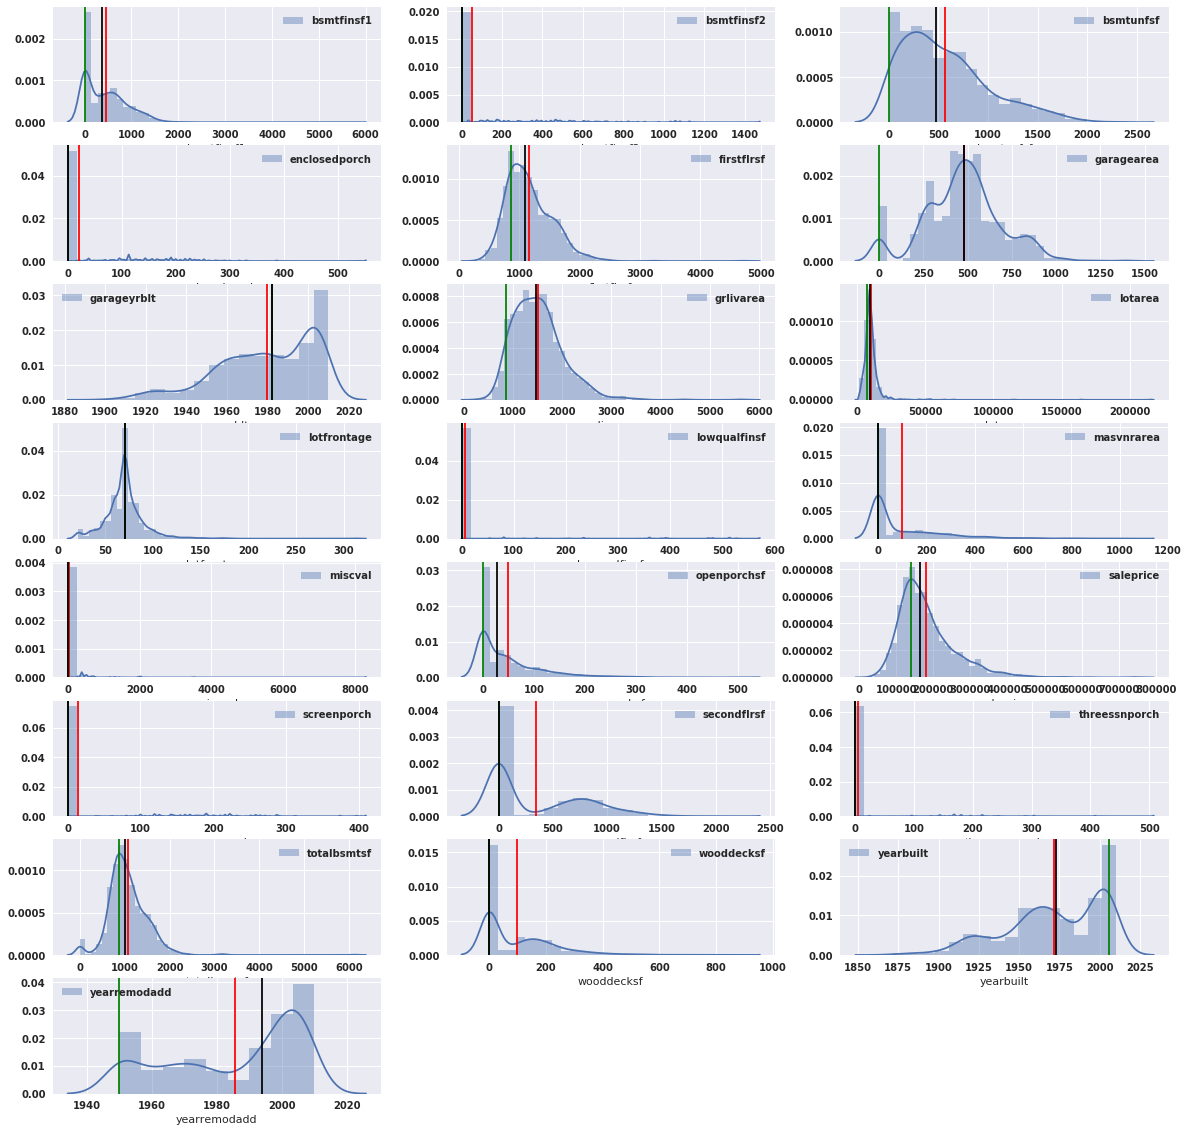

In [37]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_iowa_df.columns):
    fig.add_subplot(8,3,1+i)
    sns.distplot(numerical_iowa_df[col], label=col)
    plt.axvline(numerical_iowa_df[col].mean(), c='red')
    plt.axvline(numerical_iowa_df[col].mode()[0], c='green')
    plt.axvline(numerical_iowa_df[col].median(), c='black')
    plt.legend()

### Use `df.skew` to find the skew of the numerical features

In [38]:
from scipy.stats import skew, skewtest

In [39]:
numerical_iowa_df.skew()

bsmtfinsf1        1.8964
bsmtfinsf2        4.1004
bsmtunfsf         0.9128
enclosedporch     3.2333
firstflrsf        1.4248
garagearea        0.0945
garageyrblt      -0.7378
grlivarea         1.2980
lotarea          12.3591
lotfrontage       2.0179
lowqualfinsf      8.6023
masvnrarea        2.2357
miscval          19.7893
openporchsf       2.0044
saleprice         1.6597
screenporch       4.0437
secondflrsf       0.8075
threessnporch     9.6688
totalbsmtsf       1.8476
wooddecksf        1.5800
yearbuilt        -0.6640
yearremodadd     -0.5498
dtype: float64

### Make a list of all features for which the absolute value of the skew is > 0.75

These will need to be deskewed.

In [40]:
skewed_feats = list(numerical_iowa_df.columns[numerical_iowa_df.skew() > abs(0.75)])

skewed_feats

['bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'enclosedporch',
 'firstflrsf',
 'grlivarea',
 'lotarea',
 'lotfrontage',
 'lowqualfinsf',
 'masvnrarea',
 'miscval',
 'openporchsf',
 'saleprice',
 'screenporch',
 'secondflrsf',
 'threessnporch',
 'totalbsmtsf',
 'wooddecksf']

### Find the skew for each of these features if we apply a simple log

Either `np.log(feature)` or `np.log(1+feature)`.

In [41]:
np.log(1+numerical_iowa_df[skewed_feats]).skew()
# doesn't matter what alpha we use, some remain skewed - what to do about these?

bsmtfinsf1      -0.6300
bsmtfinsf2       2.4830
bsmtunfsf       -2.2288
enclosedporch    2.1794
firstflrsf       0.0197
grlivarea       -0.0780
lotarea         -0.1257
lotfrontage     -0.9365
lowqualfinsf     7.0175
masvnrarea       0.4939
miscval          5.3044
openporchsf     -0.1111
saleprice        0.1683
screenporch      3.2927
secondflrsf      0.3094
threessnporch    7.1437
totalbsmtsf     -5.3889
wooddecksf       0.0880
dtype: float64

### (Optional) Find the optimal skew for each feature

### Use either a simple log or an optimal log to deskew the selected numerical features

In [42]:
numerical_iowa_deskewed = np.log(1+numerical_iowa_df[skewed_feats])

### Use subplots to display distribution plots of all numerical features
Include the mean, median, and mode.

How do your distributions compare to the previous plots?

In [43]:
# bivariate distributions become more spaced out around the mean; 
# univariate variables also look more normally distributed
# some are still very skewed

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


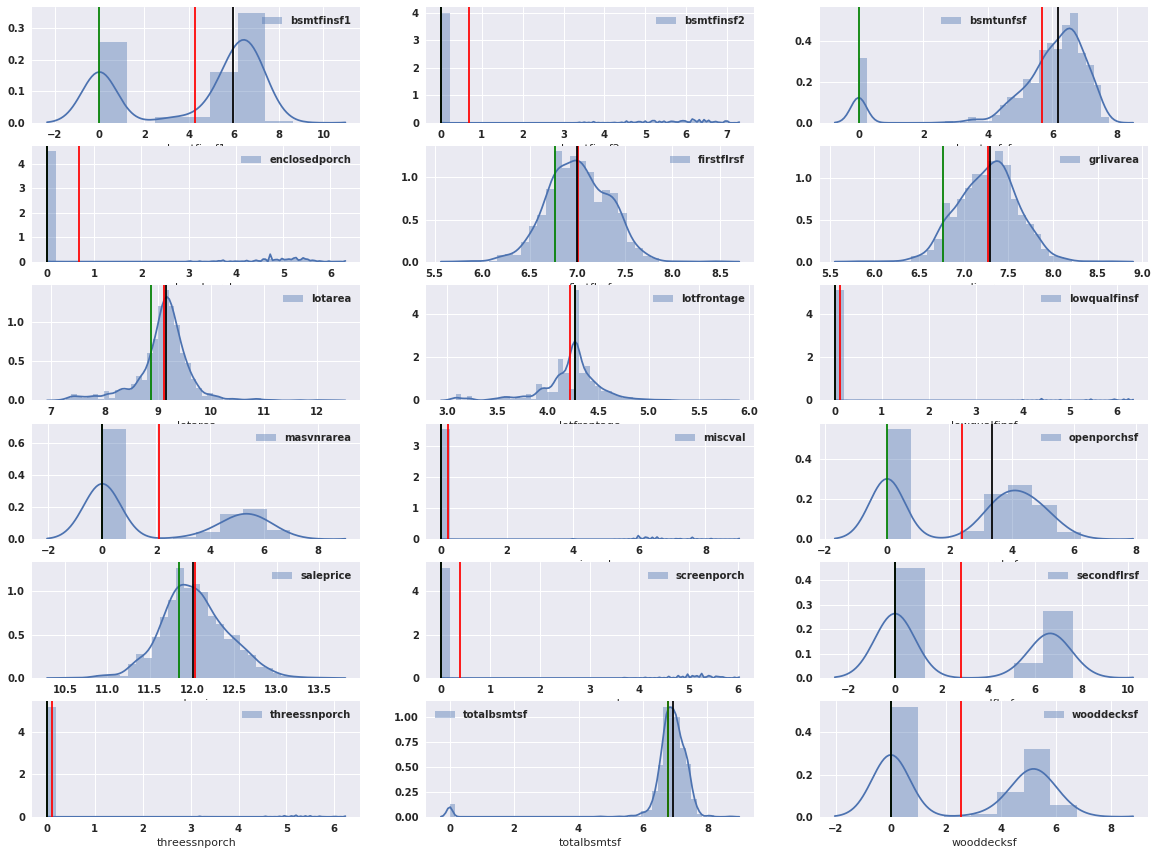

In [44]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_iowa_deskewed.columns):
    fig.add_subplot(8,3,1+i)
    sns.distplot(numerical_iowa_deskewed[col], label=col)
    plt.axvline(numerical_iowa_deskewed[col].mean(), c='red')
    plt.axvline(numerical_iowa_deskewed[col].mode()[0], c='green')
    plt.axvline(numerical_iowa_deskewed[col].median(), c='black')
    plt.legend()

### Find the features with nans in the categorical dataframe

In [45]:
cat_iowa_df.isnull().sum()

bedroomabvgr      0
bldgtype          0
bsmtcond         25
bsmtexposure     26
bsmtfintype1     25
bsmtfintype2     26
bsmtfullbath      0
bsmthalfbath      0
bsmtqual         25
centralair        0
condition1        0
condition2        0
electrical        1
extercond         0
exterior1st       0
exterior2nd       0
exterqual         0
fireplaces        0
foundation        0
fullbath          0
functional        0
garagecars        0
garagecond       63
garagefinish     63
garagequal       63
garagetype       63
halfbath          0
heating           0
heatingqc         0
housestyle        0
kitchenabvgr      0
kitchenqual       0
landcontour       0
landslope         0
lotconfig         0
lotshape          0
masvnrtype        6
mosold            0
mssubclass        0
mszoning          0
neighborhood      0
overallcond       0
overallqual       0
paveddrive        0
poolarea          0
roofmatl          0
roofstyle         0
salecondition     0
saletype          0
street            0


### How many columns of each data type are there?

In [46]:
cat_iowa_df.dtypes.value_counts()

object    53
dtype: int64

In [47]:
cat_iowa_df.shape

(1095, 53)

### Replace the null rows for these features with the mode

In [48]:
for col in cat_iowa_df:
    cat_iowa_df[col] = cat_iowa_df[col].fillna(cat_iowa_df[col].mode()[0])
cat_iowa_df.isnull().sum()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


bedroomabvgr     0
bldgtype         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfintype2     0
bsmtfullbath     0
bsmthalfbath     0
bsmtqual         0
centralair       0
condition1       0
condition2       0
electrical       0
extercond        0
exterior1st      0
exterior2nd      0
exterqual        0
fireplaces       0
foundation       0
fullbath         0
functional       0
garagecars       0
garagecond       0
garagefinish     0
garagequal       0
garagetype       0
halfbath         0
heating          0
heatingqc        0
housestyle       0
kitchenabvgr     0
kitchenqual      0
landcontour      0
landslope        0
lotconfig        0
lotshape         0
masvnrtype       0
mosold           0
mssubclass       0
mszoning         0
neighborhood     0
overallcond      0
overallqual      0
paveddrive       0
poolarea         0
roofmatl         0
roofstyle        0
salecondition    0
saletype         0
street           0
totrmsabvgrd     0
utilities        0
yrsold      

### How many columns of each data type are there?

In [49]:
cat_iowa_df.dtypes.value_counts()

object    38
int64     15
dtype: int64

### Cast the whole categorical dataframe as an object

In [50]:
cat_iowa_df = cat_iowa_df.astype(object)

In [51]:
cat_iowa_df.dtypes.value_counts()

object    53
dtype: int64

### Get Dummy Variable Columns for all categorical columns

In [52]:
cat_iowa_dummies = pd.get_dummies(cat_iowa_df)

### What is the shape of the new categorical dataframe?

In [53]:
cat_iowa_dummies.shape

(1095, 333)

### Merge the processed numerical and categorical dataframes

In [54]:
iowa_df_merged = pd.merge(cat_iowa_dummies, numerical_iowa_deskewed, left_index=True, right_index=True)

In [55]:
iowa_df_merged.columns

Index(['bedroomabvgr_0', 'bedroomabvgr_1', 'bedroomabvgr_2', 'bedroomabvgr_3',
       'bedroomabvgr_4', 'bedroomabvgr_5', 'bedroomabvgr_6', 'bldgtype_1Fam',
       'bldgtype_2fmCon', 'bldgtype_Duplex',
       ...
       'lowqualfinsf', 'masvnrarea', 'miscval', 'openporchsf', 'saleprice',
       'screenporch', 'secondflrsf', 'threessnporch', 'totalbsmtsf',
       'wooddecksf'],
      dtype='object', length=351)

### Assign `saleprice` to target and the remaining columns to `features`

In [56]:
target = iowa_df_merged['saleprice']
features = iowa_df_merged.drop('saleprice', axis=1)

In [57]:
target.head()

id
1    12.2477
4    11.8494
5    12.4292
7    12.6346
8    12.2061
Name: saleprice, dtype: float64

In [58]:
features.head()

,bedroomabvgr_0,bedroomabvgr_1,bedroomabvgr_2,bedroomabvgr_3,bedroomabvgr_4,bedroomabvgr_5,bedroomabvgr_6,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,...,lotfrontage,lowqualfinsf,masvnrarea,miscval,openporchsf,screenporch,secondflrsf,threessnporch,totalbsmtsf,wooddecksf
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,4.1897,0.0,5.2832,0.0000,4.1271,0.0,6.7511,0.0,6.7534,0.0000
4,0,0,0,1,0,0,0,1,0,0,...,4.1109,0.0,0.0000,0.0000,3.5835,0.0,6.6294,0.0,6.6294,0.0000
5,0,0,0,0,1,0,0,1,0,0,...,4.4427,0.0,5.8608,0.0000,4.4427,0.0,6.9603,0.0,7.0440,5.2627
7,0,0,0,1,0,0,0,1,0,0,...,4.3307,0.0,5.2311,0.0000,4.0604,0.0,0.0000,0.0,7.4307,5.5452
8,0,0,0,1,0,0,0,1,0,0,...,4.2678,0.0,5.4848,5.8608,5.3230,0.0,6.8916,0.0,7.0103,5.4638


### pickle features and target dataframes

In [59]:
# turns it into a binary
features.to_pickle('features.pickle')
target.to_pickle('target.pickle')